In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.stats.mstats as st1

## Greenwish Ltd

The primary objective of this analysis and decision-making process is to identify the most suitable make and model of electric vehicles that align with Greenwish Ltd's requirements and the needs of its sales representatives. This decision will be data-driven, based on a thorough evaluation of various factors that impact the performance, efficiency, and practicality of electric vehicles for the sales team's daily operations.

In [49]:
df = pd.read_csv("ev_dataset.csv")
df.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


## Data Cleaning & EDA
Firstly, I will look at exploring the 'EV_dataset' file to gain a comprehensive understanding of the data. Additionally, I will diligently clean the dataset, addressing any necessary adjustments, in order to ensure the extraction of accurate and meaningful insights.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [51]:
df.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


In [52]:
df.drop(['link'], axis = 1, inplace = True)
df

,id,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,390,275,330,575,355,445,7.8,185,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,330,235,280,480,300,375,6.2,160,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,400,305,350,580,385,470,3.2,260,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,445,340,390,670,440,540,5.7,190,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,440,320,380,660,415,520,7.9,160,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,390,290,340,560,370,450,2.8,260,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,440,320,380,660,415,515,7.9,160,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,210,140,170,295,170,220,11.7,135,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,395,290,340,580,370,460,6.2,180,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [53]:
#I have used the 'id' column to check if there are any duplicate rows within the data set
df.id.duplicated()
df.id.duplicated().sum()

0

In [54]:
#I have used the isnull() function to verify that there are no missing values
df.isnull().count()

id                             194
Make                           194
City - Cold Weather            194
Highway - Cold Weather         194
Combined - Cold Weather        194
City - Mild Weather            194
Highway - Mild Weather         194
Combined - Mild Weather        194
Acceleration 0 - 100 km/h      194
Top Speed                      194
Electric Range                 194
Total Power                    194
Total Torque                   194
Drive                          194
Battery Capacity               194
Charge Power                   194
Charge Speed                   194
Fastcharge Speed               194
Length                         194
Width                          194
Height                         194
Wheelbase                      194
Gross Vehicle Weight (GVWR)    194
Max. Payload                   194
Cargo Volume                   194
Seats                          194
dtype: int64

In [55]:
#The value counts function shows me the number of makes given in the dataset
df.Make.value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
MG             8
BMW            8
Fiat           8
Toyota         8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Volvo          4
Genesis        4
Tesla          4
CUPRA          4
Hongqi         2
Smart          2
Polestar       2
Honda          2
Dacia          1
Subaru         1
DS             1
JAC            1
Nissan         1
Mini           1
Seres          1
Jaguar         1
Lexus          1
Mazda          1
Name: Make, dtype: int64

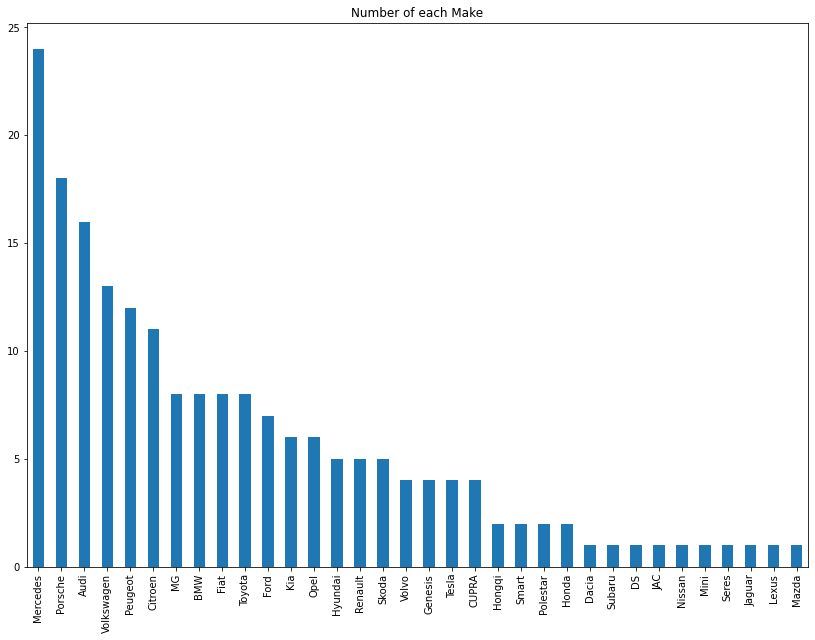

In [56]:
bar = df['Make'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Number of each Make")


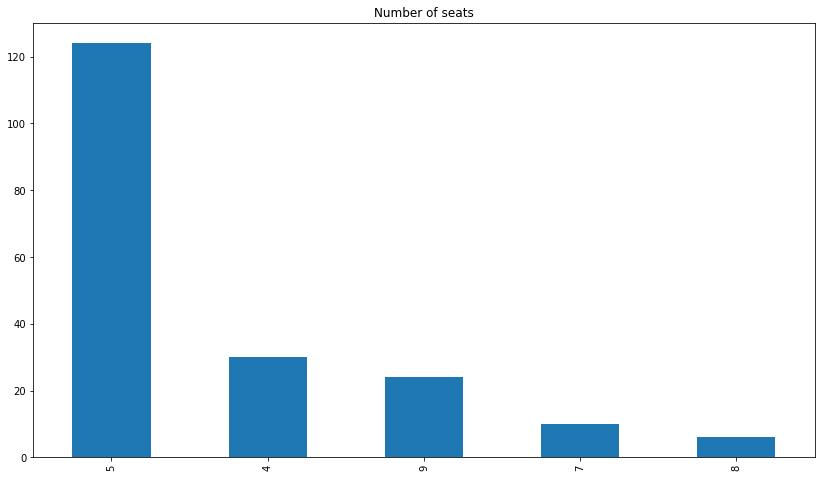

In [57]:
bar1 = df['Seats'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of seats")

## Analysis

Across the dataset given, the most appropriate factors for Greenwish Ltd and their Sales reps would be the following:
    
1. Electric Range: This is a crucial factor as it directly impacts the distance an electric vehicle can travel on a single charge. Sales reps typically cover significant mileage, so a longer electric range ensures they can complete their daily routes without frequent charging stops, improving efficiency and reducing downtime.
   
2. Miles - Mild Weather: Analysing combined miles in mild weather conditions provides insights into the overall efficiency of electric vehicles. It accounts for factors such as driving conditions, temperature, and energy consumption. A higher combined mileage suggests better energy utilisation and can help identify models that optimise efficiency for day-to-day driving.

3. Miles - Cold weather: Cold weather can significantly impact an electric vehicle's range and efficiency due to factors like increased battery drain, reduced regenerative braking efficiency, and increased energy consumption for heating.So, analysing this variable will prove beneficial to gain insights to the EVs performance in challenging weather conditions.
   
4. Cargo Volume:Sales reps may often need to carry materials, samples, or merchandise for their sales presentations or deliveries. Analysing the cargo volume available in electric vehicles helps ensure that the chosen options can accommodate the necessary storage space for their business needs.

Below I will analyse and provide visulisations on the significant factors stated

### Electric Range

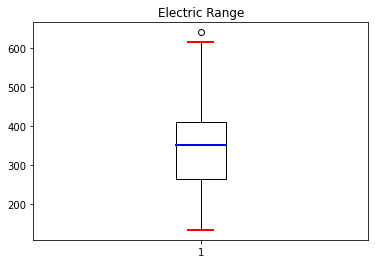

In [58]:
box1 = plt.boxplot(df["Electric Range"])
plt.title("Electric Range")
for median in box1['medians']:
    median.set(color ='blue',
               linewidth = 2)
for cap in box1['caps']:
    cap.set(color ='red',
            linewidth = 2)
plt.show()

In [59]:
df["Electric Range"].median()

352.5

In [60]:
df["Electric Range"].max()

640

In [61]:
# Sorted the Dataframe by electric range in descending order
sorted_df = df.sort_values('Electric Range', ascending=False)

# Selected the top 5 longest electric ranges
top_5 = sorted_df.head(5)

range_table = top_5[['Make', 'id', 'Electric Range',]]
range_table.columns = ['Make', 'id', 'Electric Range']
print(range_table.to_string(index=False))


     Make    id  Electric Range
 Mercedes  1483             640
 Mercedes  1699             615
 Mercedes  1700             605
 Mercedes  1484             605
 Mercedes  1537             565


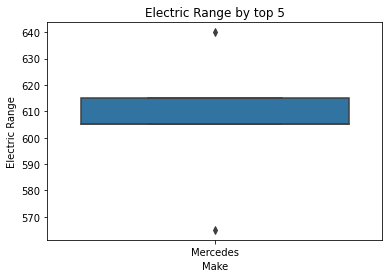

In [62]:
# Extracted the top 5 model names and electric ranges
id_names = top_5['id'].tolist()
electric_ranges = top_5['Electric Range'].tolist()
sns.boxplot(x='Make', y='Electric Range', data=top_5)
plt.title('Electric Range by top 5')
plt.ylabel('Electric Range')
plt.xticks(rotation=0)
plt.show()

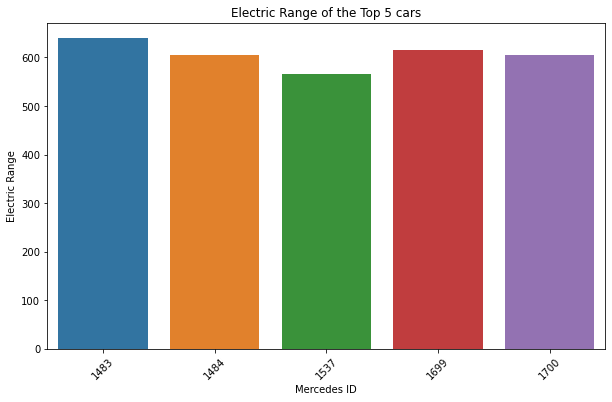

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='id', y='Electric Range', data=top_5)
plt.title('Electric Range of the Top 5 cars')
plt.xlabel('Mercedes ID')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

From the analysis above, we can see that the top 5 vehicles in terms of electric range all come from Mercedes. The mean electric milage across the dataset is 353 miles, with the top 5 ranges range from 565 to 615 with an outlier of 640 miles from Mercedes 1483.

Below I have looked at some other variables within the dataset to see if there are any correlation with Electric Range. This will give us a better understanding of what areas will give us the most optimal and efficient car for Greenwish Ltd.

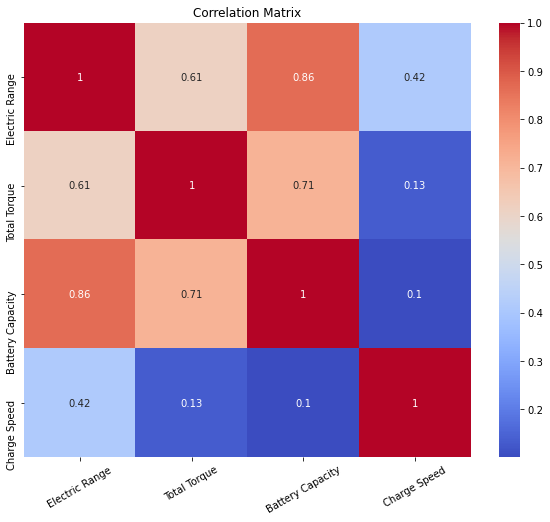

In [64]:
Selected_variables = ['Electric Range', 'Total Torque', 'Battery Capacity', 'Charge Speed']
HM_data = df[Selected_variables]
# Calculated the correlation matrix
corr_matrix = HM_data.corr()

# Generated a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.show()

The correlation heatmap indicates a strong correlation (0.86) between Electric Range and Battery Capacity. I have decided to use a scatterplot to show which vehicles with the highest Electric range compared with the amount of Battery Capacity. The below diagram shows that car ID Mercedes 1483, has the highest range and capacity compared to the data set.

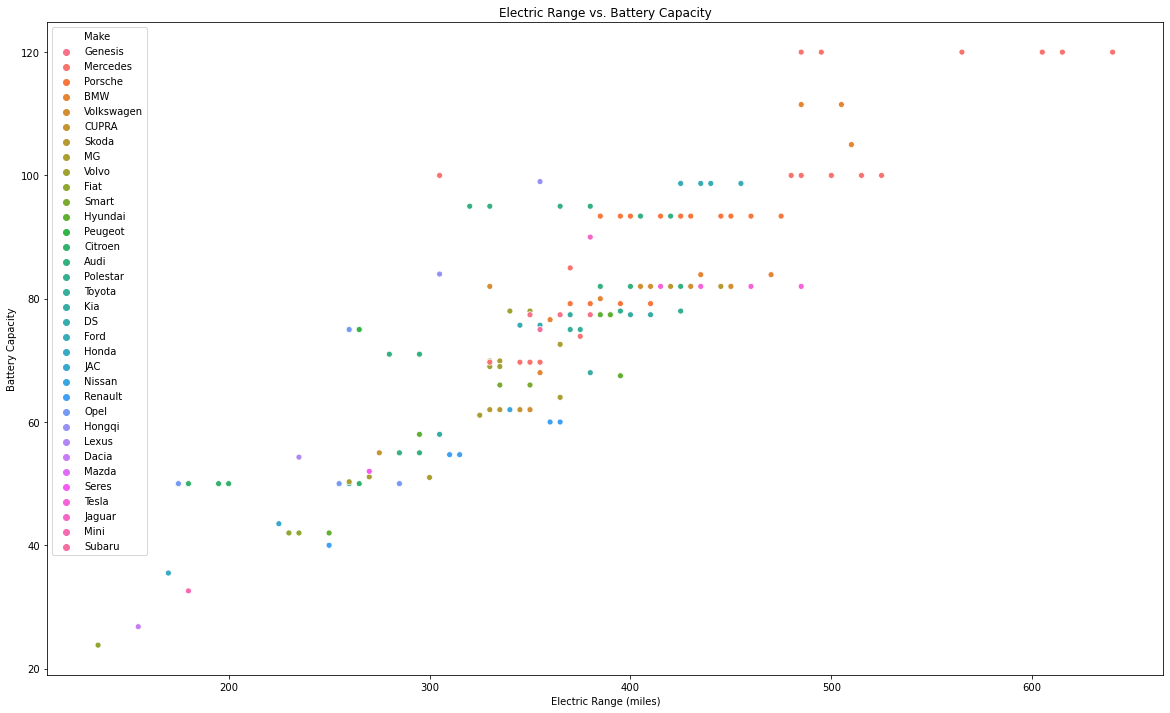

In [65]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Electric Range', y='Battery Capacity', data=df, hue='Make')
plt.title('Electric Range vs. Battery Capacity')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Battery Capacity')
plt.show()

## Combined Miles - Mild & Cold Weather

In [66]:
df["Combined - Mild Weather"].mean()

393.6082474226804

In [67]:
df["Combined - Cold Weather"].mean()

293.1443298969072

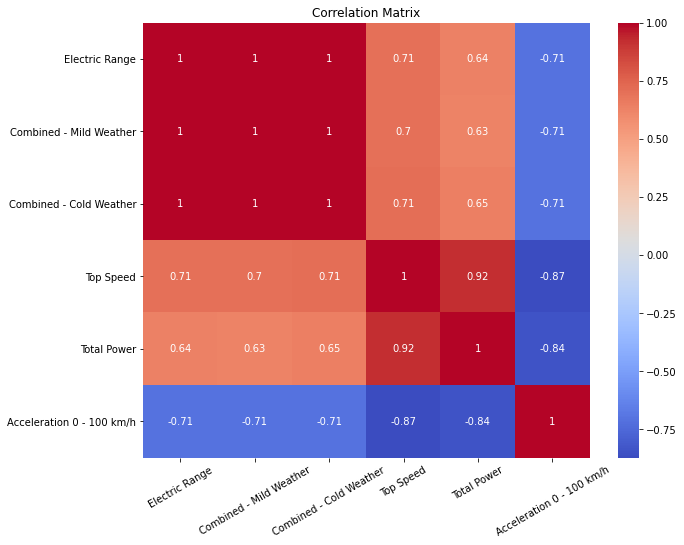

In [84]:
Selected_variables = ['Electric Range', 'Combined - Mild Weather', 'Combined - Cold Weather', 'Top Speed', 'Total Power', 'Acceleration 0 - 100 km/h']
HM_data = df[Selected_variables]

corr_matrix = HM_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.show()

A strong positive correlation between electric range and combined conditions in both mild and cold weather indicates that as the electric range of a vehicle increases, the combined miles it can travel under mild and cold weather conditions also tend to increase. This suggests that vehicles with a longer electric range are more likely to have a greater overall range in various weather conditions, allowing them to cover more miles before requiring a recharge. 

Below is a Scatterplot showing with each data point representing an electric vehicle, with its position determined by its electric range and combined conditions value.

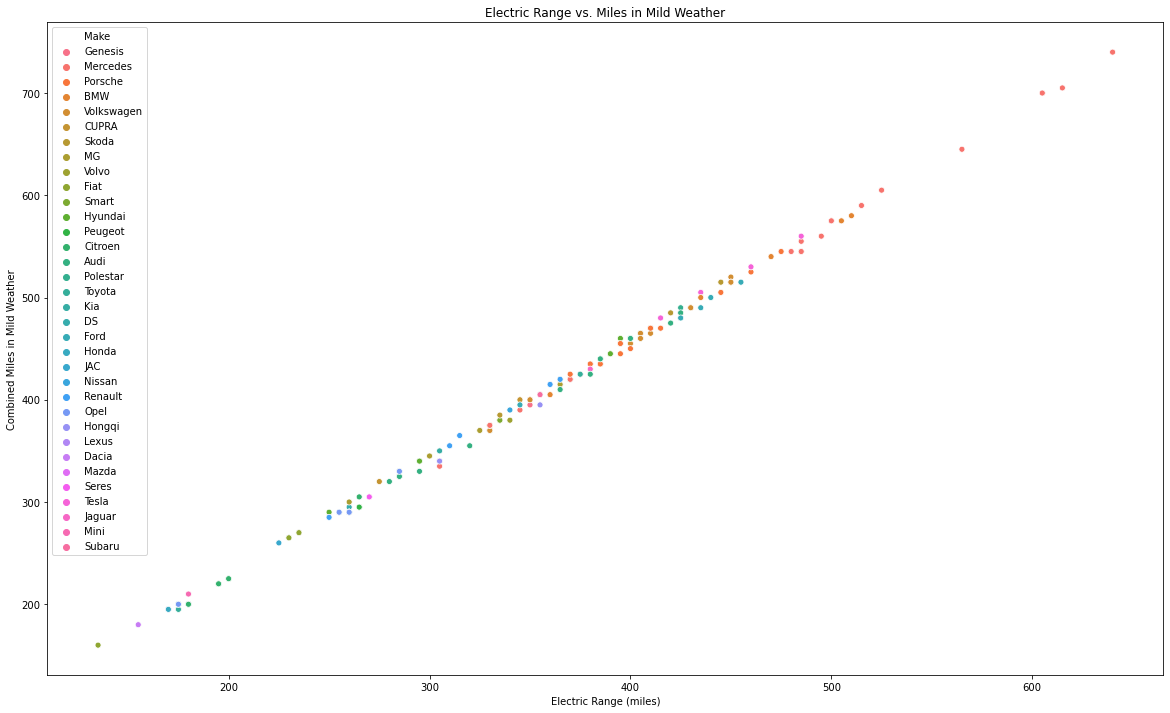

In [69]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Electric Range', y='Combined - Mild Weather', data=df, hue='Make')
plt.title('Electric Range vs. Miles in Mild Weather')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Combined Miles in Mild Weather')
plt.show()

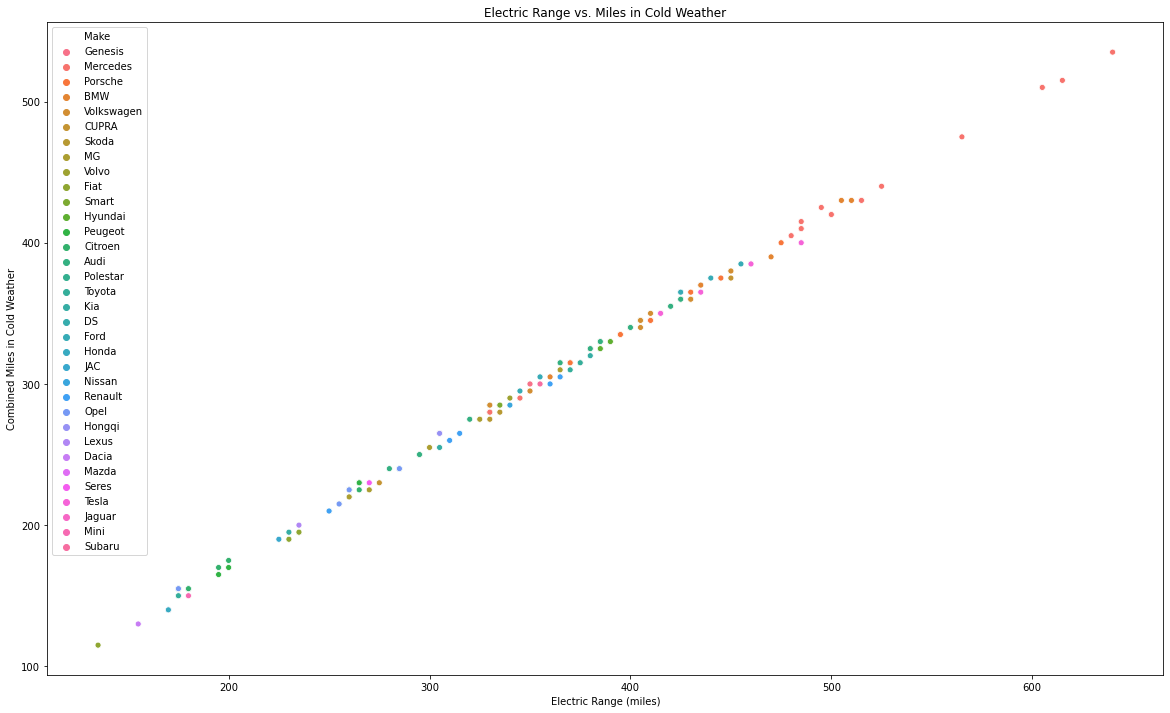

In [70]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Electric Range', y='Combined - Cold Weather', data=df, hue='Make')
plt.title('Electric Range vs. Miles in Cold Weather')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Combined Miles in Cold Weather')
plt.show()

In [71]:
# Sorted the Dataframe by  in descending order
sorted_df_mild = df.sort_values('Combined - Mild Weather', ascending=False)

# Selected the top 5 longest ranges in mild weather 
top_5_mild = sorted_df_mild.head(5)

range_table = top_5_mild[['Make', 'id', 'Combined - Mild Weather',]]
range_table.columns = ['Make', 'id', 'Combined - Mild Weather']
print(range_table.to_string(index=False))

     Make    id  Combined - Mild Weather
 Mercedes  1483                      740
 Mercedes  1699                      705
 Mercedes  1484                      700
 Mercedes  1700                      700
 Mercedes  1537                      645


In [72]:
sorted_df_cold = df.sort_values('Combined - Cold Weather', ascending=False)

top_5_cold = sorted_df_cold.head(5)

range_table = top_5_cold[['Make', 'id', 'Combined - Cold Weather',]]
range_table.columns = ['Make', 'id', 'Combined - Cold Weather']
print(range_table.to_string(index=False))

     Make    id  Combined - Cold Weather
 Mercedes  1483                      535
 Mercedes  1699                      515
 Mercedes  1700                      510
 Mercedes  1484                      510
 Mercedes  1537                      475


Based on the scatter plot analysis, if you observe a strong positive correlation between electric range and combined conditions in mild and cold weather, it indicates that vehicles with a greater electric range tend to offer better performance and longer combined mileage in both mild and cold weather conditions. 

We can see the top 5 cars which have the best milage in both cold and mild conditions are Mercedes with the best vehicle being ID 1483. 

## Cargo Volume

In [82]:
avg_cargo_volume = df_filtered.groupby('Make')['Cargo Volume'].mean().sort_values(ascending=False)
print(avg_cargo_volume)

Make
Tesla         707.500000
Peugeot       703.666667
Toyota        694.500000
Citroen       675.727273
Skoda         581.000000
Opel          576.166667
Volkswagen    552.384615
Audi          551.000000
Mercedes      547.291667
Seres         526.000000
Jaguar        505.000000
BMW           492.500000
Kia           456.833333
Hyundai       449.800000
Genesis       449.750000
Subaru        441.000000
Hongqi        438.000000
Nissan        420.000000
Volvo         419.000000
Porsche       417.166667
MG            411.750000
Polestar      405.000000
Fiat          405.000000
Renault       399.200000
CUPRA         385.000000
Lexus         367.000000
Mazda         366.000000
DS            350.000000
Ford          322.000000
Smart         318.000000
Dacia         300.000000
JAC           250.000000
Mini          211.000000
Honda         171.000000
Name: Cargo Volume, dtype: float64


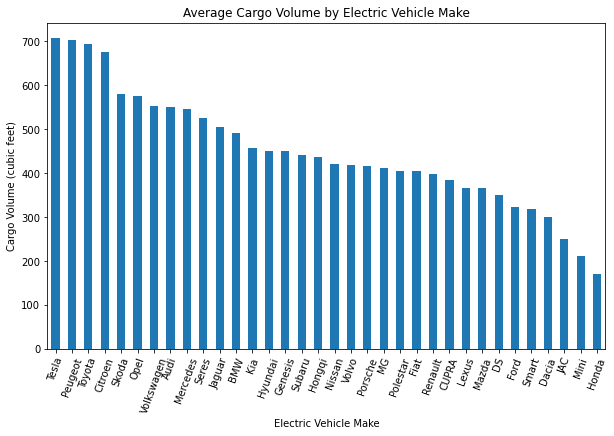

In [87]:
plt.figure(figsize=(10, 6))
avg_cargo_volume.plot(kind='bar')
plt.title('Average Cargo Volume by Electric Vehicle Make')
plt.xlabel('Electric Vehicle Make')
plt.ylabel('Cargo Volume (cubic feet)')
plt.xticks(rotation=70)
plt.show()

On avergage, the highest payload vehicle is the Teslas, with Peugeot second and Toyota third. The below heat map will show if there are any correlating variables with the maximum payload to gain a better understanding and insight to the vehicle that can take the most weight.

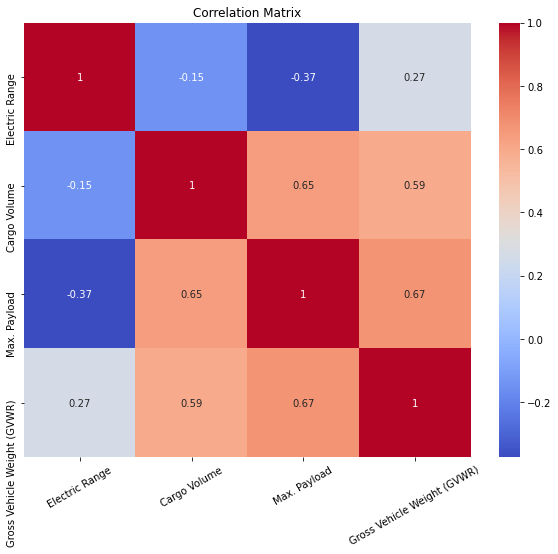

In [91]:
Selected_variables = ['Electric Range', 'Cargo Volume', 'Max. Payload', 'Gross Vehicle Weight (GVWR)']
HM_data = df[Selected_variables]
corr_matrix = HM_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.show()

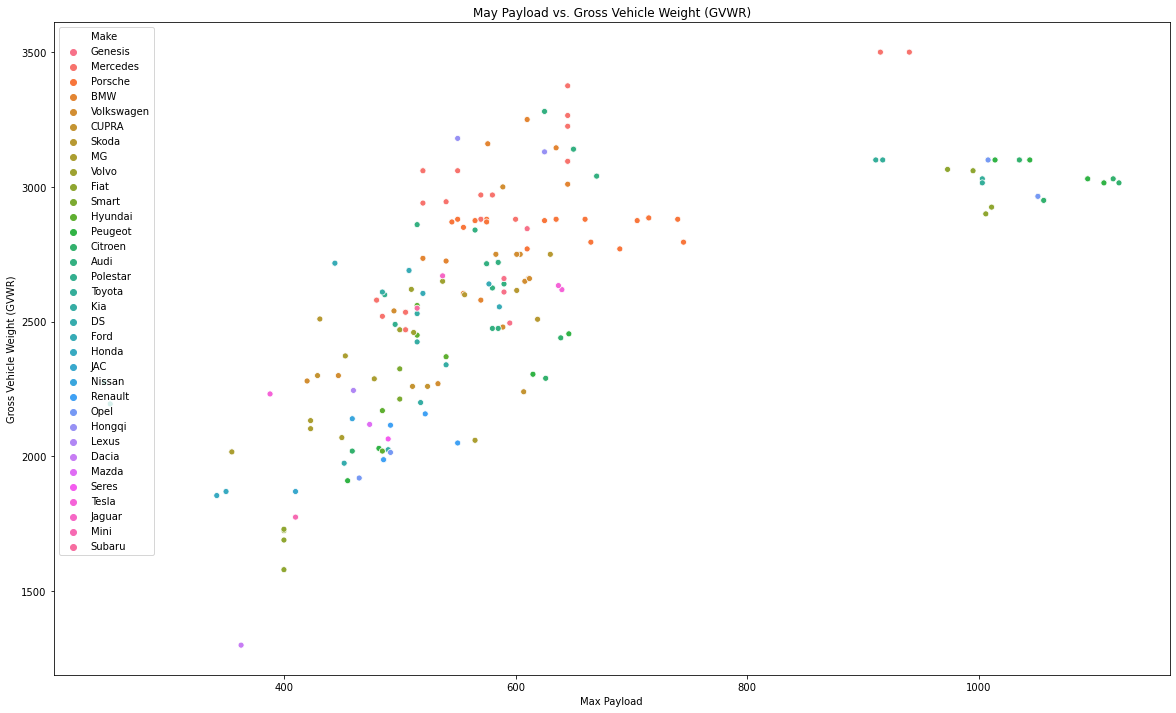

In [97]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Max. Payload', y='Gross Vehicle Weight (GVWR)', data=df, hue='Make')
plt.title('May Payload vs. Gross Vehicle Weight (GVWR)')
plt.xlabel('Max Payload')
plt.ylabel('Gross Vehicle Weight (GVWR)')
plt.show()

There is only a small correlation (0.67) between the Max payload and Gross Vehicle Weight (GVWR). As you can see above in the scatter plot, we cannot determine a strong candidate that will allow us to select a vehicle that will give us a strong conclusion.

In [96]:
sorted_df_payload = df.sort_values('Max. Payload', ascending=False)

top_5_payload = sorted_df_payload.head(10)

range_table = top_5_payload[['Make', 'id', 'Max. Payload',]]
range_table.columns = ['Make', 'id', 'Max. Payload']
print(range_table.to_string(index=False))

    Make    id  Max. Payload
 Citroen  1595          1121
 Citroen  1596          1116
 Peugeot  1605          1108
 Peugeot  1351          1108
 Peugeot  1352          1094
 Peugeot  1606          1094
 Citroen  1341          1056
    Opel  1600          1056
 Citroen  1342          1051
    Opel  1601          1051


# Conclusion

Based on the analysis of electric mileage, combined miles for mild and cold weather, and maximum payload, the most suitable electric vehicle for Greenwish Ltd's sales representatives is the Mercedes ID 1483. This vehicle offers the best electric mileage, excelling in both mild and cold weather conditions. Its impressive combined miles demonstrates its efficiency and reliability, ensuring that sales representatives can cover extensive distances without frequent charging. 

Furthermore, the Mercedes ID 1483 combines its exceptional mileage performance with a substantial payload capacity, the the average for Mecedes at 547kg allowing for the transportation of goods and materials required for sales presentations and deliveries. Although, this is relatively low compared with other vehicles in the dataset, until we understand the demographic of the sales reps, we then perhaps would have found a better suited vehicle for them.

By choosing the Mercedes ID 1483, Greenwish Ltd can provide their sales representatives with a reliable and practical electric vehicle that meets their mileage demands. 

In future, to futher my decision making process, there are a few more variables to consider: 

1. Evaluate the total cost of ownership for the electric vehicles, considering factors such as purchase price, maintenance costs, energy consumption, and potential government incentives or tax benefits against the budget of Greenwish Ltd.
2. More information on Greenwish ltd and its Sales reps. A better understanding of the company will allow us to understand the needs of the business and its sales reps. 
3. Assess the safety features offered by different electric vehicle models, including driver-assistance systems, collision avoidance, and emergency braking systems. Safety features play a crucial role in protecting the well-being of the sales reps who will be spending a significant amount of time on the road. By prioritising vehicles with advanced safety features, the risk of accidents and potential injuries can be reduced.
